In [ ]:
"""
FIGURE SUPPORT
This section is a material informatics project aiming to build a quantitative composition-structure-property (QSPR) relationship between palladium-based alloys membranes and their hydrogen permeability.
...
"""

'\nFIGURE SUPPORT\nThis section is a material informatics project aiming to build a quantitative composition-structure-property (QSPR) relationship between palladium-based alloys membranes and their hydrogen permeability.\n...\n'

In [ ]:
%%time
!pip install pymatgen matminer pymatviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [ ]:
%%time
!pip install --upgrade kaleido

CPU times: user 2.95 s, sys: 421 ms, total: 3.37 s
Wall time: 13.3 s


In [ ]:
%%time
# Import useful packages and dependencies
import os
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import math
import statistics


from pymatgen.core import Element, Composition
from matminer.featurizers.composition import ElementFraction
from matminer.featurizers.conversions import StrToComposition


import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.patches as patches
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec # For more fine-grained layout control of parity plot and shap
from matplotlib.ticker import AutoMinorLocator
from matplotlib.colors import Normalize

import seaborn as sns

# Plotting the periodic table
import plotly.express as px
import plotly.io as pio
pio.get_chrome()
import pymatviz as pmv
from pymatviz.ptable.plotly import ptable_heatmap_plotly
from pymatviz.enums import Key

# Plot wordcloud
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.style.use('bmh')

import time
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format='retina' #Allow image to have high resolution
# pio.renderers.default='svg'
pio.kaleido.scope.default_format = "svg"
np.random.seed(42) # Ensure reproducibility

CPU times: user 11.5 s, sys: 1.66 s, total: 13.2 s
Wall time: 21.6 s


In [ ]:
%%time
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
CPU times: user 1.19 s, sys: 203 ms, total: 1.4 s
Wall time: 31.8 s


In [ ]:
# Setting this options allow Pandas to display every columns. By default only few are displayed.
%%time
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

CPU times: user 75 µs, sys: 0 ns, total: 75 µs
Wall time: 78.2 µs


In [ ]:
%%time
# Datafiles
PATH_train_70 = '/content/drive/MyDrive/PhD_Pd alloy prediction/Resut_Data_cleaning/df_train_70.pkl'  #80/20
PATH_test_70 = '/content/drive/MyDrive/PhD_Pd alloy prediction/Resut_Data_cleaning/df_test_70.pkl'

PATH_train_80 = '/content/drive/MyDrive/PhD_Pd alloy prediction/Resut_Data_cleaning/df_train_80.pkl'  #85/15
PATH_test_80 = '/content/drive/MyDrive/PhD_Pd alloy prediction/Resut_Data_cleaning/df_test_80.pkl'

PATH_train_90 = '/content/drive/MyDrive/PhD_Pd alloy prediction/Resut_Data_cleaning/df_train_90.pkl'  #90/10
PATH_test_90 = '/content/drive/MyDrive/PhD_Pd alloy prediction/Resut_Data_cleaning/df_test_90.pkl'

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.58 µs


In [ ]:
%%time
# The directory where to save the figures
Figure_dir='/content/drive/MyDrive/PhD_Pd alloy prediction/Figures_Pd_Permeability_Prediction'

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [ ]:
%%time
repo = '/content/drive/MyDrive/PhD_Pd alloy prediction/Resut_Data_cleaning'
file_path=os.path.join(repo, "df_cleaned_final.pkl")
df = pd.read_pickle(file_path)
print(f'Original DataFrame shape: {df.shape}')

Original DataFrame shape: (2223, 56)
CPU times: user 11.7 ms, sys: 2.02 ms, total: 13.7 ms
Wall time: 1.46 s


In [ ]:
%%time
# Data with column similarity
PATH_train_80 = '/content/drive/MyDrive/PhD_Pd alloy prediction/Resut_Data_cleaning/df_train_80.pkl'  #85/15
PATH_test_80 = '/content/drive/MyDrive/PhD_Pd alloy prediction/Resut_Data_cleaning/df_test_80.pkl'
df_2 = pd.concat([pd.read_pickle(PATH_train_80), pd.read_pickle(PATH_test_80)], ignore_index=True)
print('The shape of df_2:', df_2.shape)

The shape of df_2: (2223, 50)
CPU times: user 10.3 ms, sys: 906 µs, total: 11.2 ms
Wall time: 763 ms


In [ ]:
print(len(df_2['Composition in mole percent'].unique()))

328


In [ ]:
%%time
# Visualizing the dataset
df.head()

CPU times: user 208 µs, sys: 36 µs, total: 244 µs
Wall time: 248 µs


,Alloy Formula,Composition type,Form,Composition in mole percent,Thickness,Lattice parameter,Bravais lattice,Temperature,Fabrication technique,Pressure difference,Pressure exponent,Permeability,General comments,Reference,DOI/URL,Composition_matrix,B,Al,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Y,Zr,Nb,Mo,Ru,Rh,Pd,Ag,In,Sn,La,Ce,Pr,Sm,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Ta,W,Ir,Pt,Au,Pb
0,Pd,mole percent,foil,Pd,0.00025,3.887000e-10,fcc,737.15,Commercial Alfa Aesar,325.7194,0.5,9.240000e-09,Membrane A see the supplementary materials in ...,"(Guerreiro et al., 2016)",https://doi.org/10.1016/j.memsci.2016.02.040,(Pd),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Pd,mole percent,disc,Pd,0.00070,3.890000e-10,fcc,673.15,Cold rolling,730.0685,0.5,1.320000e-08,Table 1 data were extracted for equation 7. Th...,"(Sakamoto et al., 1992)",https://doi.org/10.1016/0925-8388(92)90468-O,(Pd),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Pd,mole percent,disc,Pd,0.00070,3.890000e-10,fcc,673.15,Cold rolling,632.4555,0.5,1.260000e-08,Table 1 data were extracted for equation 7. Th...,"(Sakamoto et al., 1992)",https://doi.org/10.1016/0925-8388(92)90468-O,(Pd),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Pd,mole percent,disc,Pd,0.00070,3.890000e-10,fcc,673.15,Cold rolling,516.7204,0.5,1.260000e-08,Table 1 data were extracted for equation 7. Th...,"(Sakamoto et al., 1992)",https://doi.org/10.1016/0925-8388(92)90468-O,(Pd),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Pd,mole percent,disc,Pd,0.00070,3.890000e-10,fcc,623.15,Cold rolling,816.7007,0.5,1.120000e-08,Table 1 data were extracted for equation 7. Th...,"(Sakamoto et al., 1992)",https://doi.org/10.1016/0925-8388(92)90468-O,(Pd),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
%%time
path_Exp_Bond_train_80='/content/drive/MyDrive/PhD_Pd alloy prediction/Dataset for Modelling/Exp_Bond_train_80.pkl'
path_Exp_Bond_test_80='/content/drive/MyDrive/PhD_Pd alloy prediction/Dataset for Modelling/Exp_Bond_test_80.pkl'

df_3 = pd.concat([pd.read_pickle(path_Exp_Bond_train_80), pd.read_pickle(path_Exp_Bond_test_80)], ignore_index=True)

CPU times: user 3.16 ms, sys: 1.93 ms, total: 5.09 ms
Wall time: 1.36 s


In [ ]:
%%time
fig = ptable_heatmap_plotly(
    df['Composition in mole percent'], exclude_elements=["Pd"], colorscale = 'viridis' ,heat_mode="percent",
)
fig.update_layout(
    title=dict(text="<b>Elements in Palladium membrane dataset</b>", x=0.5,  font_size=22)
)

# Specifying for better formatting of the Ptable
# pio.defaults.default_width = 2400
# pio.defaults.default_height = 1600
# pio.defaults.svg_text_as_paths = True

filepath= "/content/drive/MyDrive/PhD_Pd alloy prediction/Figures_Pd_Permeability_Prediction/Ptable_Pd_membrane_dataset.pdf"
fig.write_image(filepath, format='pdf', engine='kaleido')
fig.show()
# Check link for colorscale https://plotly.com/python/builtin-colorscales/

CPU times: user 2.98 s, sys: 158 ms, total: 3.14 s
Wall time: 9.17 s


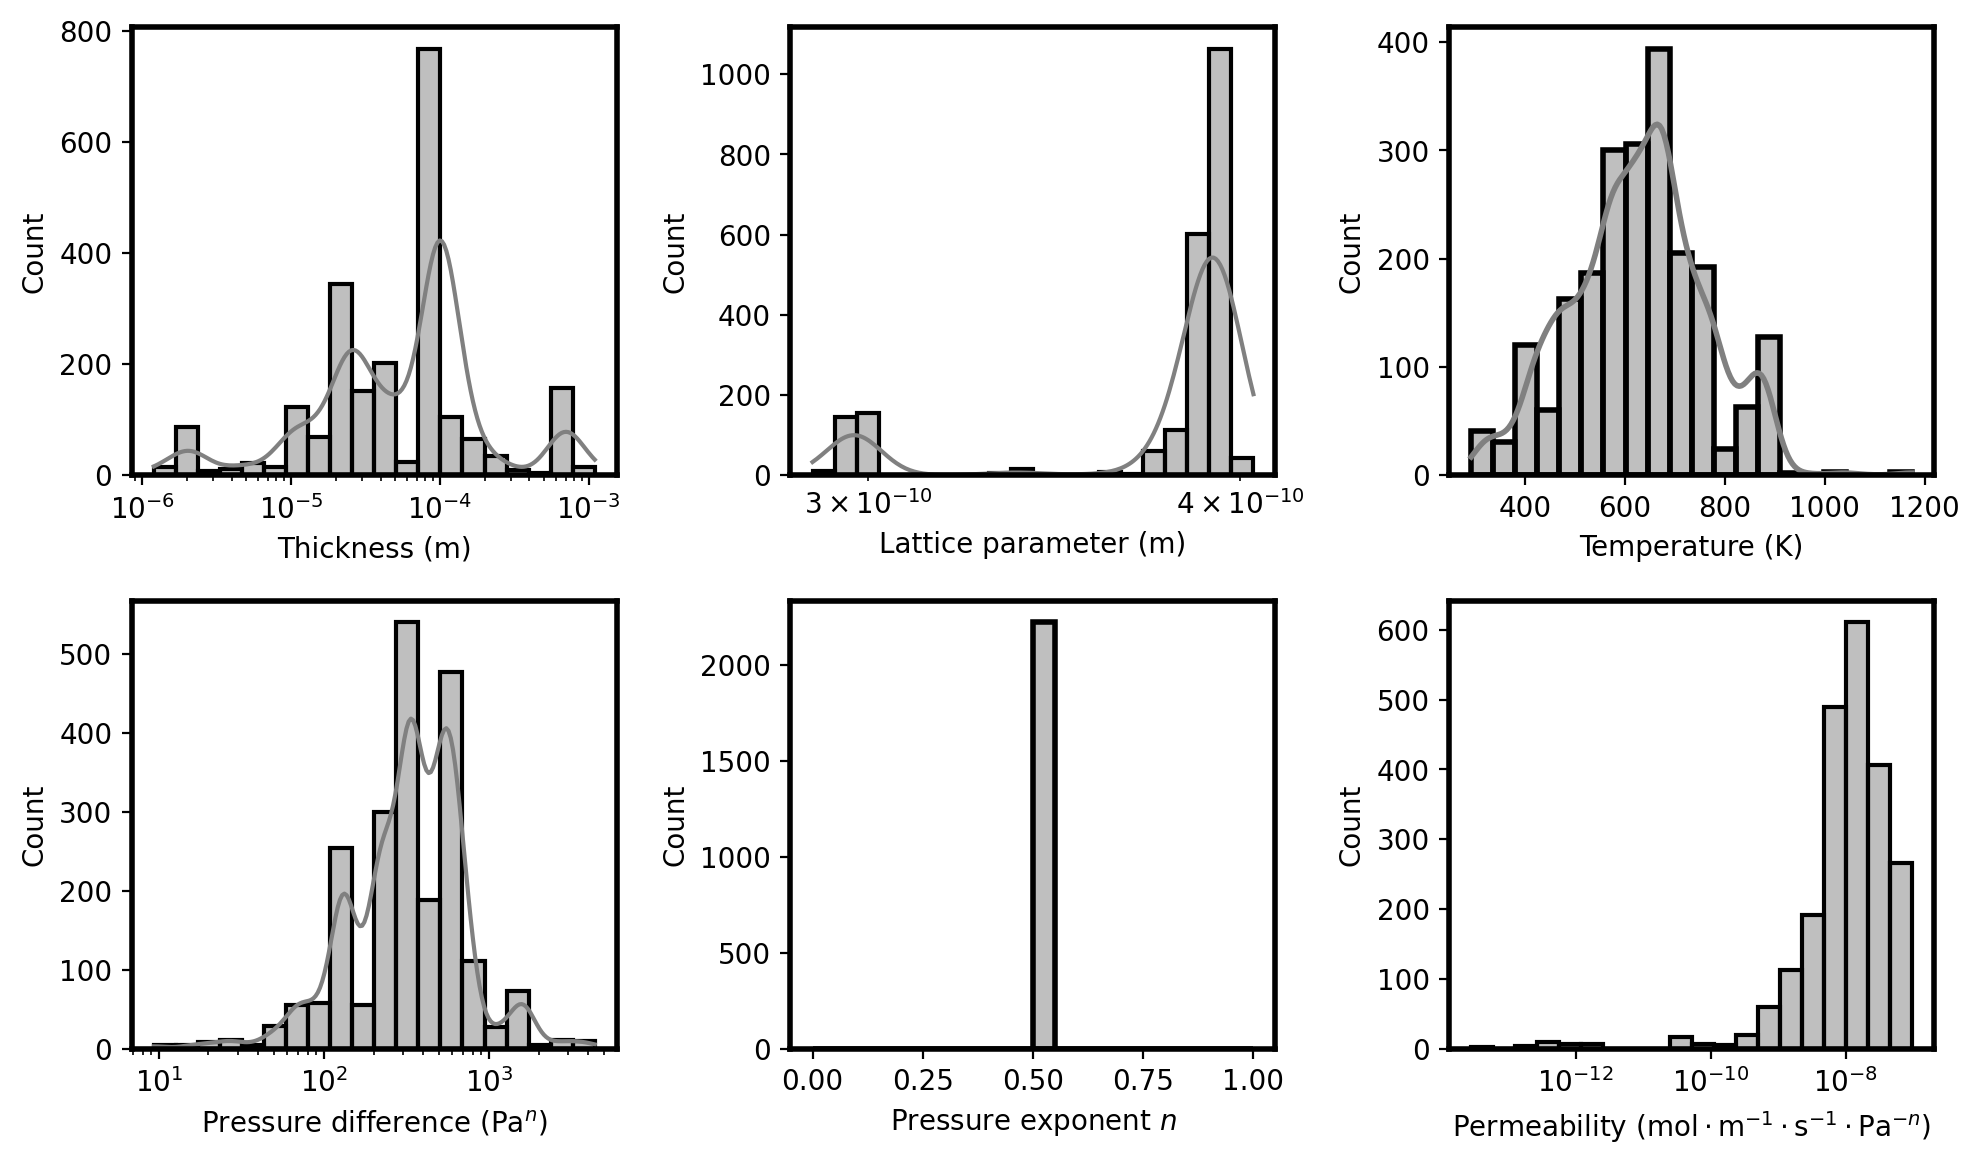

CPU times: user 2.75 s, sys: 69.4 ms, total: 2.81 s
Wall time: 2.47 s


In [ ]:
# define a function to plot the distribution of the experimental variables
#%%
%%time
# SMALL_SIZE = 8
# MEDIUM_SIZE = 10
# BIGGER_SIZE = 12 # Normally 12

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
# plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

unit_thickness = '(m)'
unit_lattice = '(m)'
unit_temperature = '(K)'
unit_pressure_difference = r'$\mathrm{Pa}^{n}$'
unit_pressure_exponent = '$n$'
unit_permeability = r'$\mathrm{mol}\cdot \mathrm{m}^{-1} \cdot \mathrm{s}^{-1} \cdot \mathrm{Pa}^{-n}$'

import matplotlib as mpl

def plot_histplot(dataframe, nrows, ncols, columns, figsize,  dpi=600): #

  fig, axes = plt.subplots(nrows, ncols,  figsize=figsize, layout='constrained')  # We can adjust width for better spacing
  for i, ax in enumerate(axes.ravel()):
      if i < len(columns):
        if columns[i]!='Pressure exponent' and columns[i]!='Temperature':
          sns.histplot(data=df, x=columns[i], bins=20, color='gray', linewidth=1.5, log_scale=True, kde=True, line_kws={'color':'black', 'lw':1.5}, ax=ax)

        elif columns[i] in ['Pressure exponent', 'Temperature', 'Permeability']:
          sns.histplot(data=df, x=columns[i], bins=20, kde=True, color='gray',linewidth=2, line_kws={'color':'black', 'lw':2}, ax=ax) # We can adjust bins
      else:
          ax.axis('off')  # Hide unused subplots if any
      # ax.set_title(f'Distribution of {columns[i]}')

      if columns[i] == 'Thickness':
        ax.set_xlabel(rf'Thickness {unit_thickness}')

      if columns[i] == 'Lattice parameter':
        ax.set_xlabel(rf'Lattice parameter {unit_lattice}')

      if columns[i] == 'Temperature':
        ax.set_xlabel(rf'Temperature {unit_temperature}')

      if columns[i] == 'Pressure difference':
        ax.set_xlabel(rf'Pressure difference ({unit_pressure_difference})')

      if columns[i] == 'Pressure exponent':
        ax.set_xlabel(f'Pressure exponent {unit_pressure_exponent}')

      if columns[i] == 'Permeability':
        ax.set_xlabel(rf'Permeability ({unit_permeability})')

      # Set spines
      for spine in ax.spines.values():
        spine.set_linewidth(2.0)



  mpl.rcParams['svg.fonttype']='none'
  figure_1_name='Univariate_histogram_distribution_Exp.svg'
  figure_1_path = os.path.join(Figure_dir, figure_1_name)
  fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.3, hspace=0.3)
  fig.tight_layout()
  fig.savefig(fname=figure_1_path, dpi=600, bbox_inches='tight', transparent=True)

  plt.show()

#%%
to_show = ['Thickness', 'Lattice parameter', 'Temperature', 'Pressure difference', 'Pressure exponent', 'Permeability']

width = 10 # Define width before calling the function
height = 6  # Define height before calling the function
plot_histplot(dataframe=df, figsize=(width, height), nrows=2, ncols=3, columns=to_show)

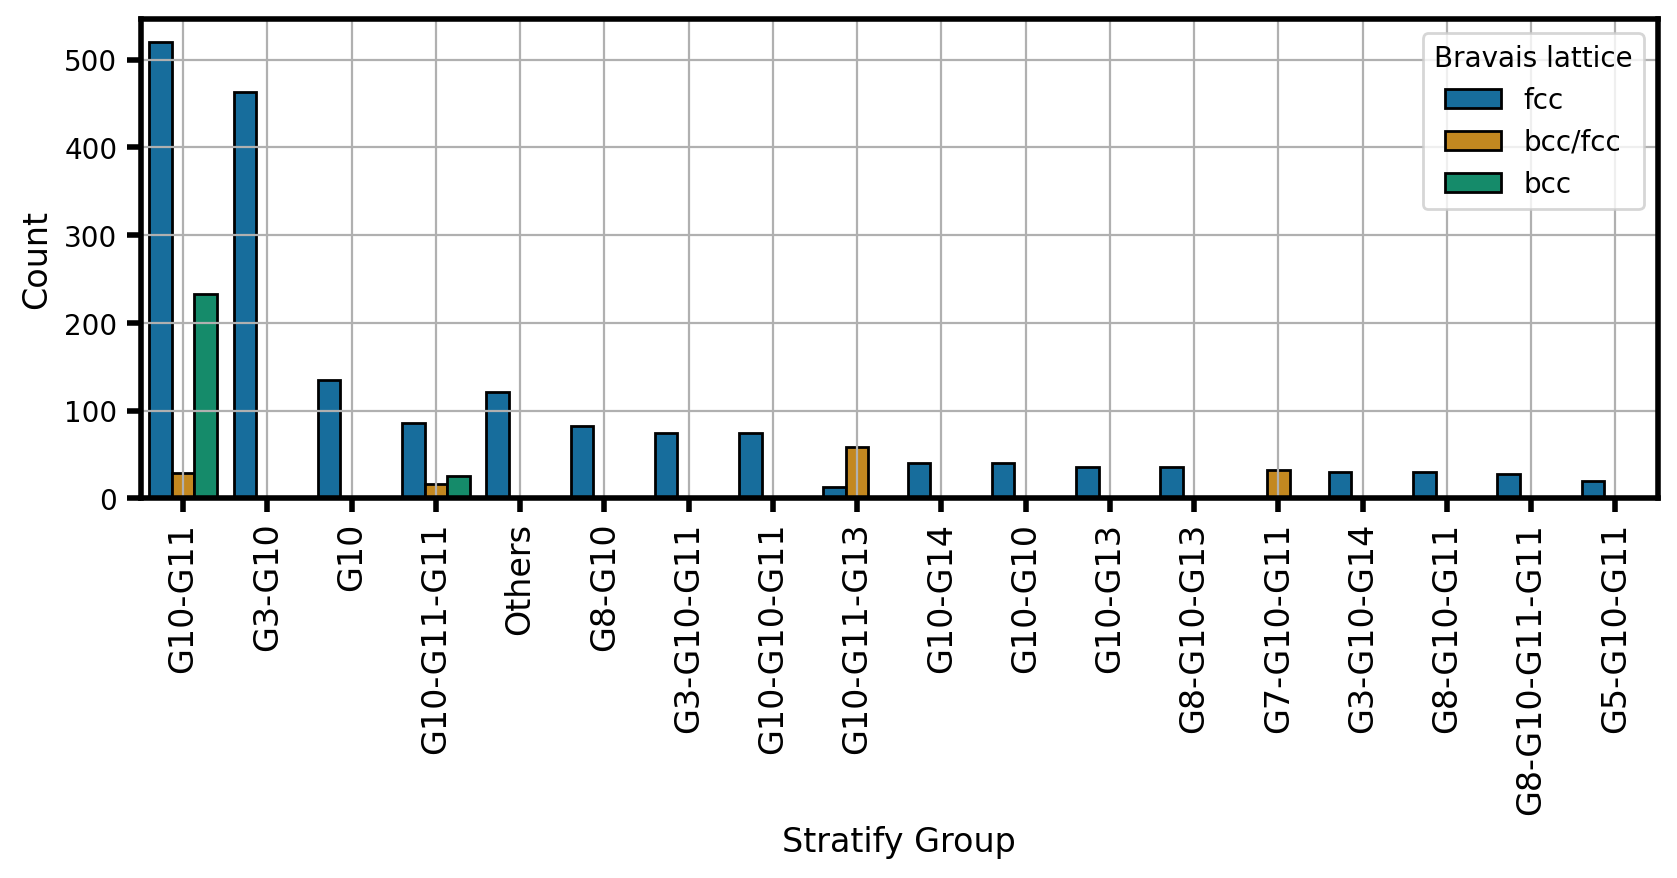

In [ ]:
# Distribution of chemical groups in the dataset
fig, ax = plt.subplots(figsize=(8.5, 4.5))

# sns.countplot(data=dfc, x='Chemical group', ax=ax, color='rebeccapurple')
sns.countplot(data=df_2, x='Stratify Group', hue='Bravais lattice', order=df_2['Stratify Group'].value_counts().index, hue_order=['fcc', 'bcc/fcc', 'bcc'],  palette='colorblind', edgecolor='black', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=90) # Get the current tick labels and set them with the desired formatting
ax.set_xlabel(xlabel='Stratify Group', fontsize=12)
ax.set_ylabel(ylabel='Count', fontsize=12, rotation=90)
# plt.xticks(rotation=45, ha='right')
ax.tick_params(which='both', length=5.0, width=2.0)
plt.grid()
for spine in ax.spines.values():
  spine.set_linewidth(2.0)
mpl.rcParams['svg.fonttype']='none'
fig.tight_layout()
Figure_1_name = 'StratifyGroupdistribution_BravaisLattice.svg'
figure_1_path = os.path.join(Figure_dir, Figure_1_name)
fig.savefig(figure_1_path, bbox_inches='tight', transparent=True, dpi=600)
plt.show()

In [ ]:
%%time
word_string=" ".join(df['Fabrication technique'].str.lower())
# wordcloud = WordCloud.generate(data_cleaned_deduplicated_cdropped['Fabrication technique'])

CPU times: user 15.4 ms, sys: 52 µs, total: 15.5 ms
Wall time: 15.4 ms


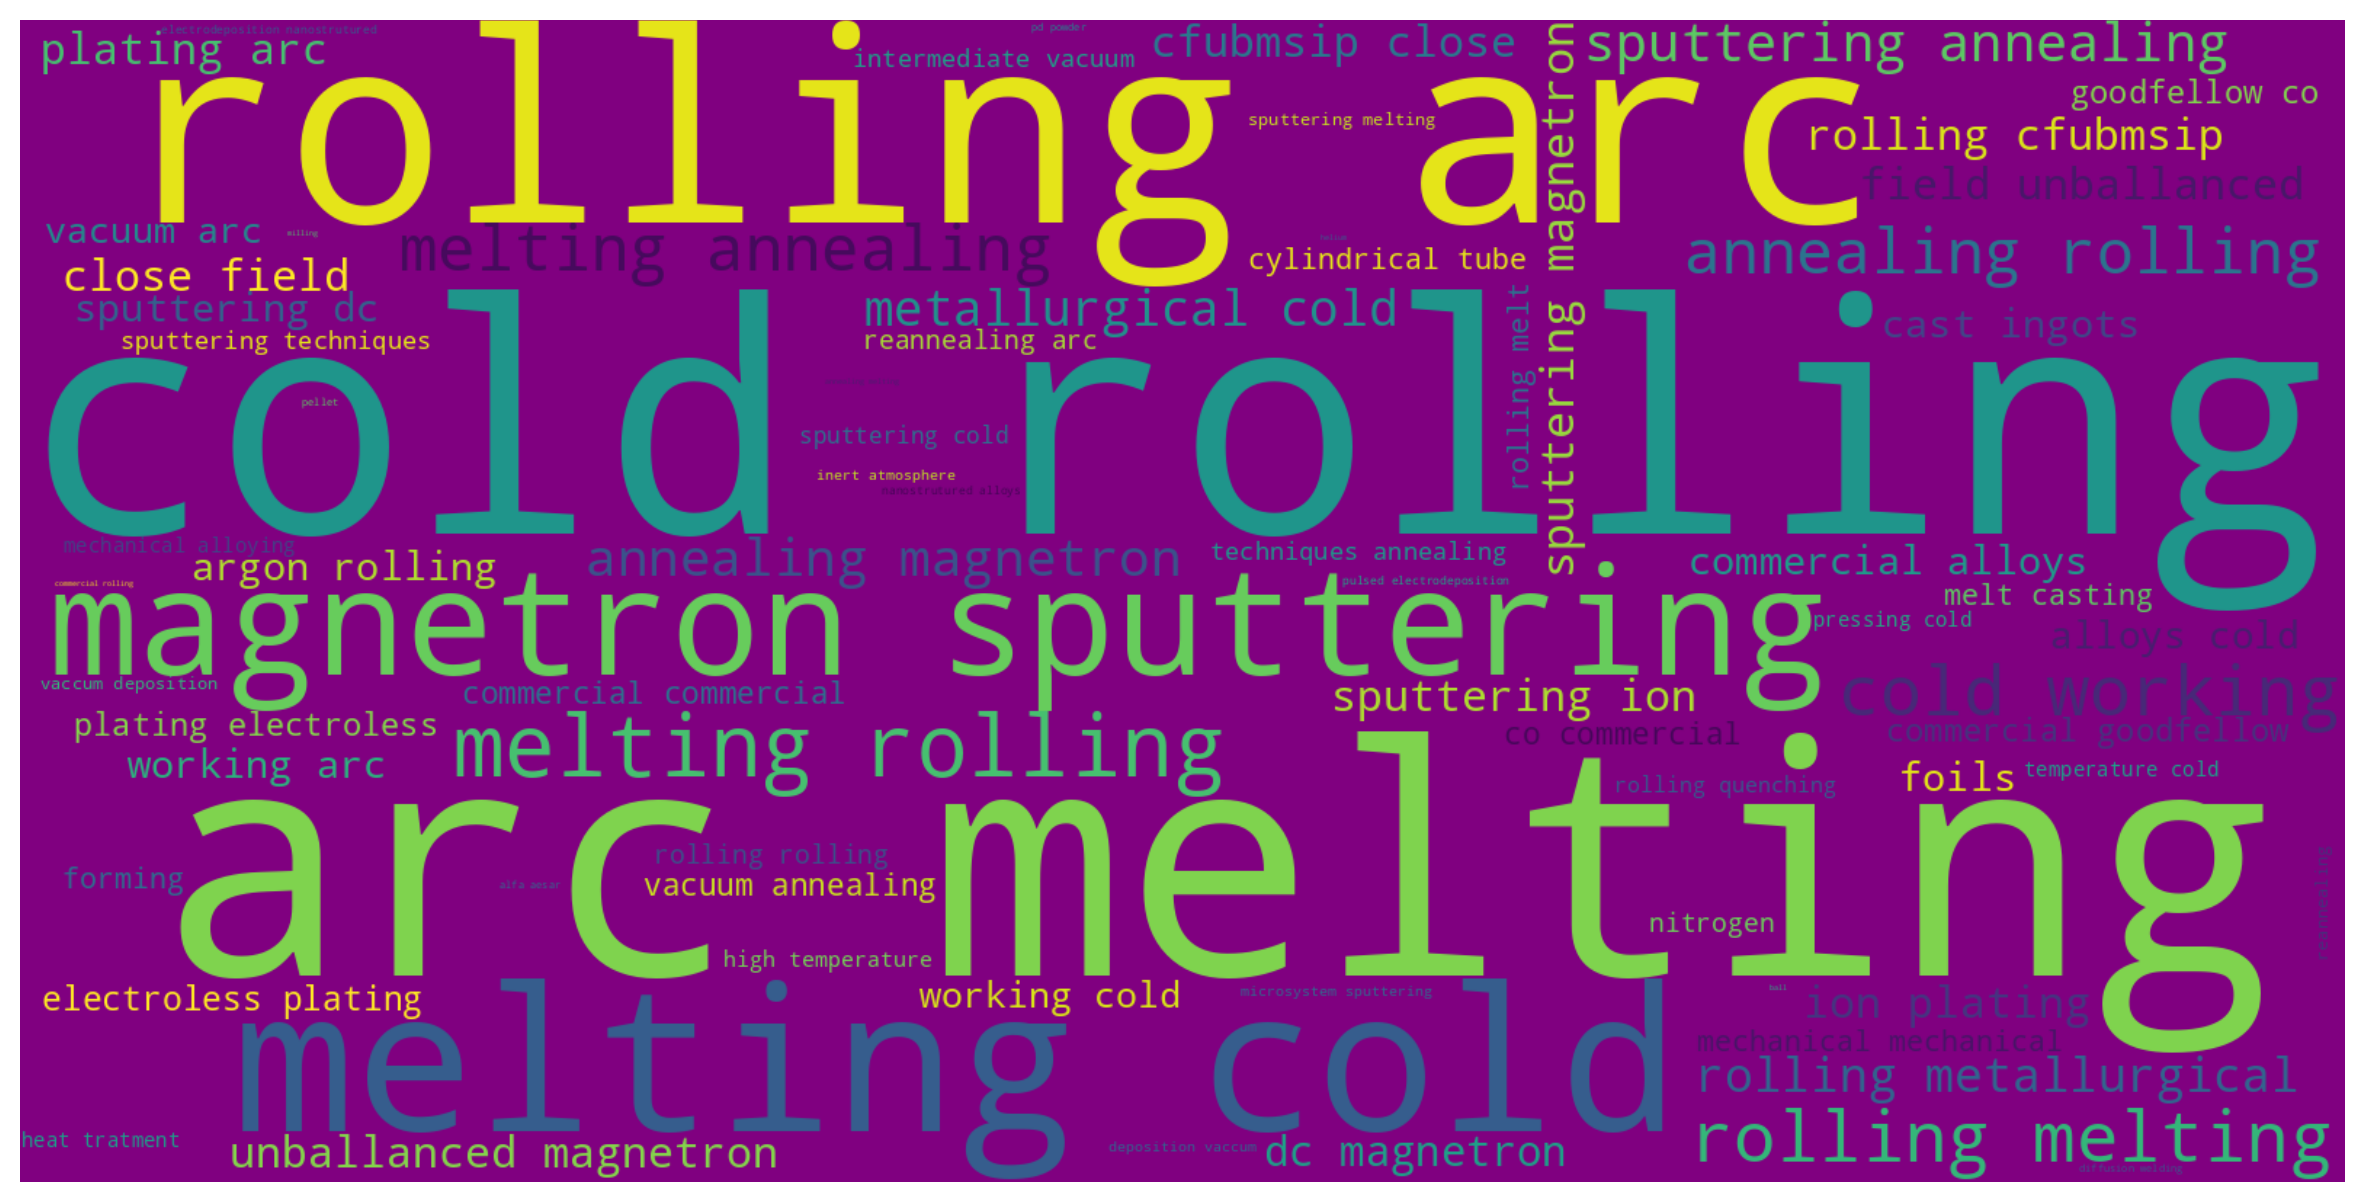

CPU times: user 7.62 s, sys: 305 ms, total: 7.93 s
Wall time: 8.22 s


In [ ]:
%%time
# Generating the wordcloud of fabricating techniques present in the dataset
# df['Fabrication technique']
fig=plt.figure(figsize=(15,15))
wc = WordCloud(background_color="purple", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')
Figure_1_name = 'Fabrication_word_cloud.svg'
figure_1_path = os.path.join(Figure_dir, Figure_1_name)
fig.savefig(figure_1_path, bbox_inches='tight', dpi=600)
plt.show()

In [ ]:
%%time
# Get percentage of binary, ternary and quaternary, etc. alloys
pure=0
binary=0
ternary=0
quaternary=0
quinary=0
senary=0
septenary=0
for comp in df['Composition_matrix'].unique():
  num_el = len(comp.as_dict().keys())
  if num_el==1:
    pure+=1
  elif num_el==2:
    binary+=1
  elif num_el==3:
    ternary+=1
  elif num_el==4:
    quaternary+=1
  elif num_el==5:
    quinary+=1
  elif num_el==6:
    senary+=1
  elif num_el==7:
    septenary+=1
  else:
    print('Might be unusual Pd-alloys')

assert pure+binary+ternary+quaternary+quinary+senary+septenary==328, 'Count not there'
result_dict = {'Pure':pure,
               'Binary':binary,
               'Ternary':ternary,
               'Quaternary':quaternary,
               'Quinary':quinary,
               'Senary':senary,
               'Septenary':septenary,
               }

result_frame = pd.DataFrame(result_dict, index=[0])
display(result_frame)

,Pure,Binary,Ternary,Quaternary,Quinary,Senary,Septenary
0,1,186,131,7,0,1,2


CPU times: user 82.3 ms, sys: 0 ns, total: 82.3 ms
Wall time: 82.2 ms


In [ ]:
%%time
# Descriptive statistics
df.describe()

CPU times: user 108 ms, sys: 859 µs, total: 109 ms
Wall time: 124 ms


,Thickness,Lattice parameter,Temperature,Pressure difference,Pressure exponent,Permeability,B,Al,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Y,Zr,Nb,Mo,Ru,Rh,Pd,Ag,In,Sn,La,Ce,Pr,Sm,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Ta,W,Ir,Pt,Au,Pb
count,2223.000000,2.223000e+03,2223.000000,2223.000000,2223.0,2.223000e+03,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.00000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,0.000118,3.768975e-10,626.772807,436.866830,0.5,1.935819e-08,0.000042,0.000976,0.000711,0.000081,0.000036,0.000145,0.001655,0.000194,0.002723,0.120378,0.000036,0.000013,0.009248,0.000109,0.000109,0.000122,0.002389,0.000151,0.789042,0.045740,0.002020,0.000540,0.000126,0.001172,0.000126,0.001583,0.001607,0.000036,0.000252,0.00121,0.000036,0.000304,0.000144,0.000538,0.000082,0.000036,0.000044,0.000991,0.013805,0.001450
std,0.000187,3.320090e-11,132.121494,420.423109,0.0,1.962539e-08,0.001412,0.005835,0.007854,0.001834,0.001697,0.002083,0.012751,0.002411,0.016441,0.212838,0.001697,0.000459,0.024635,0.002045,0.001733,0.002140,0.012134,0.003281,0.188469,0.096437,0.010771,0.006134,0.002242,0.008155,0.002242,0.011324,0.010566,0.001697,0.004483,0.00916,0.001697,0.003685,0.003391,0.006081,0.002204,0.001697,0.001734,0.007547,0.045709,0.010515
min,0.000001,2.874000e-10,292.330000,9.335500,0.5,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000025,3.865500e-10,525.730000,216.227800,0.5,5.900000e-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000091,3.903000e-10,623.150000,350.855400,0.5,1.230000e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.882000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000100,3.935000e-10,722.720000,552.786400,0.5,2.570000e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.938900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.001100,4.041000e-10,1174.560000,4377.565700,0.5,9.540000e-08,0.047100,0.060000,0.104700,0.080000,0.080000,0.080000,0.190000,0.080000,0.170000,0.937800,0.080000,0.020000,0.102000,0.080000,0.050000,0.053000,0.104700,0.103100,1.000000,0.797800,0.100000,0.090000,0.040000,0.060000,0.040000,0.110000,0.080000,0.080000,0.080000,0.08000,0.080000,0.045000,0.080000,0.080000,0.080000,0.080000,0.080000,0.120000,0.397600,0.113800


In [ ]:
%%time
# Loading dataset for statistical analysis
df_train_80=pd.read_pickle(PATH_train_70)
df_test_80=pd.read_pickle(PATH_test_70)

df_train_85=pd.read_pickle(PATH_train_80)
df_test_85=pd.read_pickle(PATH_test_80)

df_train_95=pd.read_pickle(PATH_train_90)
df_test_95=pd.read_pickle(PATH_test_90)

CPU times: user 36.8 ms, sys: 6.66 ms, total: 43.4 ms
Wall time: 2.24 s


In [ ]:
%%time
def compute_sst(df, y_col="Permeability", space="raw"):
    """
    Sum of squares total: sum_i (y_i - y_bar)^2
    space: "raw" for original units, "log1p" to work in log1p space.
    """
    y = df[y_col].to_numpy(dtype=float)
    if space == "log1p":
        y = np.log1p(y)
    y = y[~np.isnan(y)]              # drop NaNs
    mu = y.mean()
    return float(np.sum((y - mu) ** 2))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [ ]:
%%time
# Comparison on raw unit scale
print('Test_80')
print('STD', dict(df_test_80['Permeability'].describe())['std'])
print('IQR', dict(df_test_80.Permeability.describe())['75%']-dict(df_test_80.Permeability.describe())['25%'])
print('')
print('Test_85')
print('STD', dict(df_test_85['Permeability'].describe())['std'])
print('IQR', dict(df_test_85['Permeability'].describe())['75%']-dict(df_test_80['Permeability'].describe())['25%'])
print('')
print('Test_95')
print('STD', dict(df_test_95['Permeability'].describe())['std'])
print('IQR', dict(df_test_95['Permeability'].describe())['75%']-dict(df_test_80['Permeability'].describe())['25%'], end='\n')

Test_80
STD 2.2624080245186647e-08
IQR 2.6240000000000002e-08

Test_85
STD 2.154073698127225e-08
IQR 2.894e-08

Test_95
STD 6.743304497916047e-09
IQR 8.539999999999999e-09
CPU times: user 14.7 ms, sys: 856 µs, total: 15.5 ms
Wall time: 16.1 ms


In [ ]:
%%time
# Comparison on log(1+Permeability) scale
# First make copy
dfc_train_80=df_train_80.copy()
dfc_test_80=df_test_80.copy()

dfc_train_85=df_train_85.copy()
dfc_test_85=df_test_85.copy()

dfc_train_95=df_train_95.copy()
dfc_test_95=df_test_95.copy()

# Create np.log1p column
# dfc_train_80['log1p(Perm)']=df_train_80.copy()
dfc_test_80['log1p(Perm)']=dfc_test_80['Permeability'].apply(lambda x: np.log1p(x))

# dfc_train_85['log1p(Perm)']=df_train_85.copy()
dfc_test_85['log1p(Perm)']=dfc_test_85['Permeability'].apply(lambda x: np.log1p(x))

# dfc_train_95['log1p(Perm)']=df_train_95.copy()
dfc_test_95['log1p(Perm)']=dfc_test_95['Permeability'].apply(lambda x: np.log1p(x))

CPU times: user 7.16 ms, sys: 0 ns, total: 7.16 ms
Wall time: 7.17 ms


In [ ]:
  dfc_test_95.head()

,Composition in mole percent,Thickness,Lattice parameter,Bravais lattice,Chemical group,Temperature,Pressure difference,Permeability,Composition_matrix,B,Al,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Y,Zr,Nb,Mo,Ru,Rh,Pd,Ag,In,Sn,La,Ce,Pr,Sm,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Ta,W,Ir,Pt,Au,Pb,Stratify Group,log1p(Perm)
168,Pd40.21Cu57.86Al1.93,0.000025,2.915000e-10,bcc/fcc,G10-G11-G13,873.15,130.3881,6.500000e-09,"(Pd, Cu, Al)",0.0,0.0193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G10-G11-G13,6.500000e-09
205,Pd44.5Cu55.0Al0.5,0.000025,2.957000e-10,bcc/fcc,G10-G11-G13,873.15,130.3881,1.080000e-08,"(Pd, Cu, Al)",0.0,0.0050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G10-G11-G13,1.080000e-08
206,Pd44.5Cu55.0Al0.5,0.000025,2.957000e-10,bcc/fcc,G10-G11-G13,772.99,130.3881,9.490000e-09,"(Pd, Cu, Al)",0.0,0.0050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G10-G11-G13,9.490000e-09
207,Pd44.5Cu55.0Al0.5,0.000025,2.957000e-10,bcc/fcc,G10-G11-G13,622.82,130.3881,4.990000e-09,"(Pd, Cu, Al)",0.0,0.0050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G10-G11-G13,4.990000e-09
208,Pd44.5Cu55.0Al0.5,0.000025,2.957000e-10,bcc/fcc,G10-G11-G13,722.28,130.3881,7.160000e-09,"(Pd, Cu, Al)",0.0,0.0050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G10-G11-G13,7.160000e-09


In [ ]:
%%time
# Comparison on log(1+Permeability) scale
print('Test_80')
print('STD', dict(dfc_test_80['log1p(Perm)'].describe())['std'])
print('Var', dict(dfc_test_80['log1p(Perm)'].describe())['std']**2)
print('IQR', dict(dfc_test_80['log1p(Perm)'].describe())['75%']-dict(dfc_test_80['log1p(Perm)'].describe())['25%'])
print('STD/IQR', dict(dfc_test_80['log1p(Perm)'].describe())['std']/dict(dfc_test_80['log1p(Perm)'].describe())['75%']-dict(dfc_test_80['log1p(Perm)'].describe())['25%'])
print('SST',compute_sst(dfc_test_80, y_col="Permeability", space="log1p"))
print('')
print('Test_85')
print('STD', dict(dfc_test_85['log1p(Perm)'].describe())['std'])
print('Var', dict(dfc_test_85['log1p(Perm)'].describe())['std']**2)
print('IQR', dict(dfc_test_85['log1p(Perm)'].describe())['75%']-dict(dfc_test_80['log1p(Perm)'].describe())['25%'])
print('STD/IQR', dict(dfc_test_85['log1p(Perm)'].describe())['std']/dict(dfc_test_85['log1p(Perm)'].describe())['75%']-dict(dfc_test_80['log1p(Perm)'].describe())['25%'])
print('SST',compute_sst(dfc_test_85, y_col="Permeability", space="log1p"))
print('')
print('Test_95')
print('STD', dict(dfc_test_95['log1p(Perm)'].describe())['std'])
print('Var', dict(dfc_test_95['log1p(Perm)'].describe())['std']**2)
print('IQR', dict(dfc_test_95['log1p(Perm)'].describe())['75%']-dict(dfc_test_80['log1p(Perm)'].describe())['25%'])
print('IQR', dict(dfc_test_95['log1p(Perm)'].describe())['std']/dict(dfc_test_95['log1p(Perm)'].describe())['75%']-dict(dfc_test_80['log1p(Perm)'].describe())['25%'])
print('SST',compute_sst(dfc_test_95, y_col="Permeability", space="log1p"))

Test_80
STD 2.2624079367439862e-08
Var 5.118489672242181e-16
IQR 2.6239999522958613e-08
STD/IQR 0.7228140435504378
SST 2.2214245177531077e-13

Test_85
STD 2.154073622901346e-08
Var 4.640033172879329e-16
IQR 2.893999943474361e-08
STD/IQR 0.6335510712707055
SST 1.5729712456060933e-13

Test_95
STD 6.743304417780892e-09
Var 4.54721544708633e-17
IQR 8.5399999203186e-09
IQR 0.495831205501606
SST 5.911380081212225e-15
CPU times: user 32.1 ms, sys: 24 µs, total: 32.2 ms
Wall time: 31.7 ms


In [ ]:
a = np.array([1, 2, 3, 4, 5])
res = np.subtract(a,1)
np.sum(np.square(res))

np.int64(30)

In [ ]:
%%time
df_2['Permeability'].describe()

CPU times: user 3.33 ms, sys: 26 µs, total: 3.36 ms
Wall time: 3.39 ms


,Permeability
count,2.223000e+03
mean,1.935819e-08
std,1.962539e-08
min,0.000000e+00
25%,5.900000e-09
50%,1.230000e-08
75%,2.570000e-08
max,9.540000e-08


In [ ]:
2.570000e-08-5.900000e-09

1.98e-08

In [ ]:
IQR = np.linspace(start=5.900000e-09, stop=2.570000e-08)

MAE_range= [8.06e-09, 8.07e-09, 8.13e-09, 8.29e-09, 9.03e-09, 8.13e-09, 7.87e-09, 7.09e-09, 8.29e-09, 8.56e-09, 8.8e-09, 7.84e-09, 8.24e-09, 7.9e-09, 8.52e-09, 8.29e-09, 8.6e-09, 8.56e-09, 8.52e-09, 8.94e-09, 9.12e-09]
min_mae=min(MAE_range)
max_mae=max(MAE_range)
print('min_MAE:', min_mae)
print('max_MAE:', max_mae)
print(IQR.min() <= max_mae <= IQR.max())   # True if inside [start, stop]
print(IQR.min() <= min_mae <= IQR.max())

min_MAE: 7.09e-09
max_MAE: 9.12e-09
True
True


In [ ]:
%%time
#Plot Pearson correlation
#Import data first
df = pd.read_pickle('/content/drive/MyDrive/PhD_Pd alloy prediction/Resut_Data_cleaning/bond_properties_train_80.pkl')

CPU times: user 3.1 ms, sys: 10 µs, total: 3.11 ms
Wall time: 7.72 ms


In [ ]:
df.head()

,No of Components,Atomic Size diff. (δ),Δχ,ΔHmix,ΔSmix,Omega (Ω),VEC,Melting Tempurature,Λ,γ,Mean Cohesive Energy,D⋅r,D⋅χ,G,η,δG,D⋅G,Mean APE
0,1,0.0,0.0,0.0,-0.0,0.0,10.0,1828.05,0.0,1.0,375.327817,0.0,0.0,5.111000e+10,0.0,0.0,0.0,0.023994
1,1,0.0,0.0,0.0,-0.0,0.0,10.0,1828.05,0.0,1.0,375.327817,0.0,0.0,5.111000e+10,0.0,0.0,0.0,0.023994
2,1,0.0,0.0,0.0,-0.0,0.0,10.0,1828.05,0.0,1.0,375.327817,0.0,0.0,5.111000e+10,0.0,0.0,0.0,0.023994
3,1,0.0,0.0,0.0,-0.0,0.0,10.0,1828.05,0.0,1.0,375.327817,0.0,0.0,5.111000e+10,0.0,0.0,0.0,0.023994
4,1,0.0,0.0,0.0,-0.0,0.0,10.0,1828.05,0.0,1.0,375.327817,0.0,0.0,5.111000e+10,0.0,0.0,0.0,0.023994


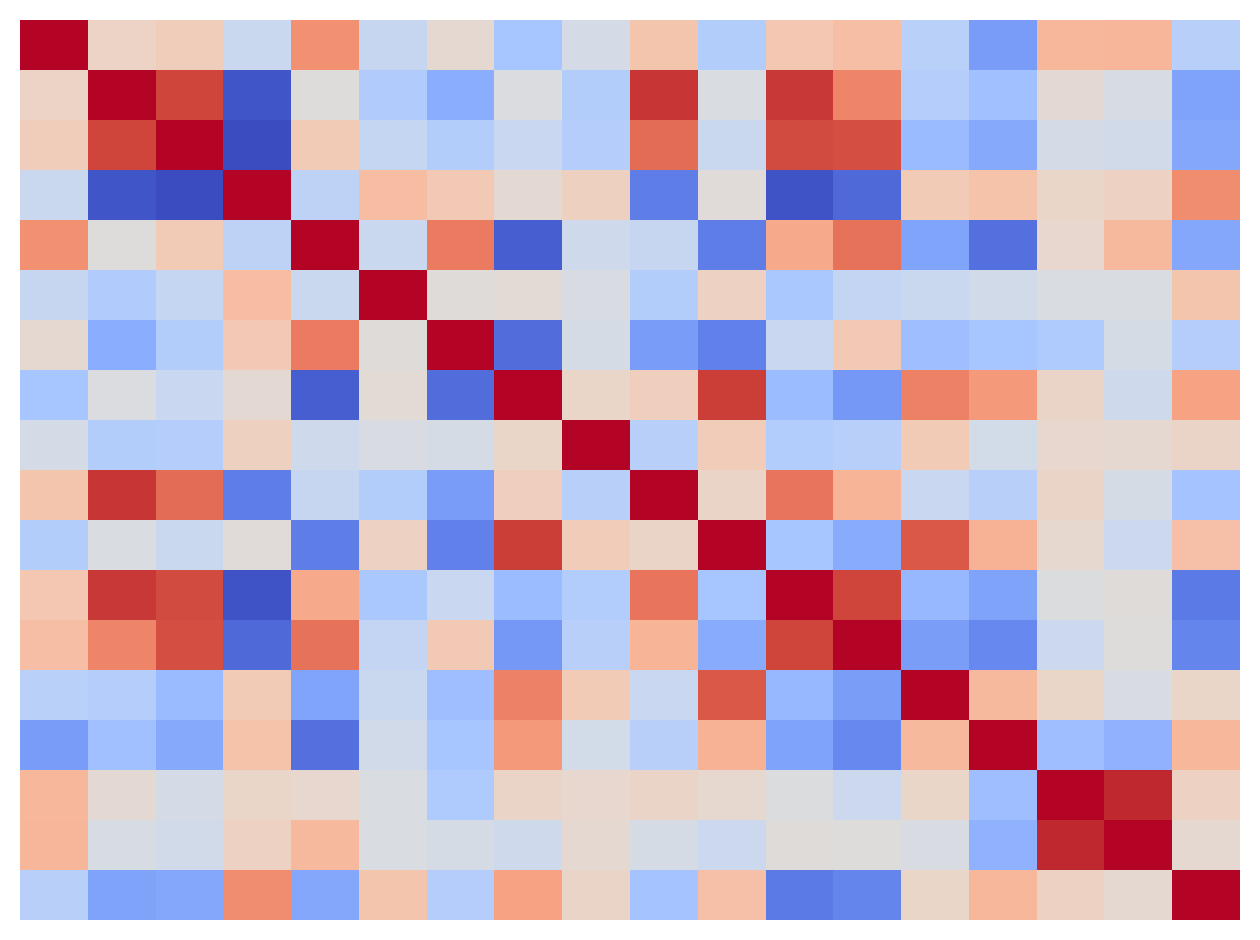

CPU times: user 219 ms, sys: 2.93 ms, total: 222 ms
Wall time: 229 ms


In [ ]:
%%time
# Plot
data=df.select_dtypes(include=np.number)
fig, ax=plt.subplots()
sns.heatmap(data.corr(), cmap='coolwarm', cbar=False, ax=ax)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig(fname=os.path.join(Figure_dir,'heatmap_Graphical_abstract.svg'), transparent=True, bbox_inches='tight', dpi=600, format='svg')
fig.tight_layout()
plt.show()

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/PhD_Pd alloy prediction/Resut_Data_cleaning/cbfv_df_train_70.pkl')
df.head()

,avg_Atomic weight,avg_Atomic number,avg_Period,avg_Group,avg_Quantum number ℓ,avg_Metal(1)/metalloid(2)/nonmetal(3),avg_Mendeleev_number,avg_Families,avg_Valence_s,avg_Valence_p,avg_Valence_d,avg_Valence_f,avg_Unfilled_s,avg_Unfilled_p,avg_Unfilled_d,avg_Unfilled_f,avg_No. of valence electrons,avg_Outer shell electrons,avg_Gilman no. of valence electrons,avg_Metallic valence,avg_Zeff,avg_Ionization energy,avg_Electron affinity,avg_Pauling EN,avg_Martynov Batsanov EN,avg_Mulliken EN,avg_Allred EN,avg_Allred Rockow EN,avg_Nagle EN,avg_Ghosh EN,avg_Atomic radius calculated,avg_Covalent radius,avg_Effective ionic radius,avg_Miracle radius,avg_van der Waals radius,avg_Slater radius,"avg_Pauling, R(CN12)","avg_Pauling, R(1)",avg_Polarizability,avg_Boiling point,avg_Density,avg_Specific heat,avg_Heat of fusion,avg_Heat of vaporization,avg_Heat of atomization,avg_Thermal conductivity,avg_Thermal expansion,avg_Cohesive energy,avg_Bulk modulus,avg_Shear modulus,avg_Young's modulus,avg_Hardness Vickers,avg_Hardness Brinell,avg_Resistivity,avg_Electrical Conductivity,avg_DFT LDA Etot,avg_DFT LDA Ekin,avg_DFT LDA Ecoul,avg_DFT LDA Eenuc,avg_DFT LDA Exc,avg_DFT LSD Etot,avg_DFT LSD Ekin,avg_DFT LSD Ecoul,avg_DFT LSD Eenuc,avg_DFT LSD Exc,avg_DFT RLDA Etot,avg_DFT RLDA Ekin,avg_DFT RLDA Ecoul,avg_DFT RLDA Eenuc,avg_DFT RLDA Exc,avg_DFT ScRLDA Etot,avg_DFT ScRLDA Ekin,avg_DFT ScRLDA Ecoul,avg_DFT ScRLDA Eenuc,avg_DFT ScRLDA Exc
0,106.42,46.0,5.0,10.0,2.0,1.0,62.0,4.0,0.0,0.0,10.0,0.0,2.0,6.0,0.0,14.0,10.0,10.0,3.0,5.78,3.101,804.397946,54.031768,2.2,2.08,4.45,2.2,1.59,1.61,2.13,1.690000e-10,1.310000e-10,5.900000e-11,1.420000e-10,1.630000e-10,1.400000e-10,1.373000e-10,1.278000e-10,4.800000e-30,3413.15,12000.0,0.00024,17.6,357.0,378.0,71.8,0.000012,375.327817,1.870000e+11,4.400000e+10,1.210000e+11,461000000.0,37200000.0,1.000000e-10,10000000.0,-12957809.75,12949581.72,5334086.148,-30883430.44,-358047.1934,-12957809.75,12949581.72,5334086.148,-30883430.44,-358047.1934,-13221486.93,13773244.16,5401468.776,-32047348.43,-348851.4479,-13218769.46,13675220.75,5395353.24,-31941090.88,-348252.5739
1,106.42,46.0,5.0,10.0,2.0,1.0,62.0,4.0,0.0,0.0,10.0,0.0,2.0,6.0,0.0,14.0,10.0,10.0,3.0,5.78,3.101,804.397946,54.031768,2.2,2.08,4.45,2.2,1.59,1.61,2.13,1.690000e-10,1.310000e-10,5.900000e-11,1.420000e-10,1.630000e-10,1.400000e-10,1.373000e-10,1.278000e-10,4.800000e-30,3413.15,12000.0,0.00024,17.6,357.0,378.0,71.8,0.000012,375.327817,1.870000e+11,4.400000e+10,1.210000e+11,461000000.0,37200000.0,1.000000e-10,10000000.0,-12957809.75,12949581.72,5334086.148,-30883430.44,-358047.1934,-12957809.75,12949581.72,5334086.148,-30883430.44,-358047.1934,-13221486.93,13773244.16,5401468.776,-32047348.43,-348851.4479,-13218769.46,13675220.75,5395353.24,-31941090.88,-348252.5739
2,106.42,46.0,5.0,10.0,2.0,1.0,62.0,4.0,0.0,0.0,10.0,0.0,2.0,6.0,0.0,14.0,10.0,10.0,3.0,5.78,3.101,804.397946,54.031768,2.2,2.08,4.45,2.2,1.59,1.61,2.13,1.690000e-10,1.310000e-10,5.900000e-11,1.420000e-10,1.630000e-10,1.400000e-10,1.373000e-10,1.278000e-10,4.800000e-30,3413.15,12000.0,0.00024,17.6,357.0,378.0,71.8,0.000012,375.327817,1.870000e+11,4.400000e+10,1.210000e+11,461000000.0,37200000.0,1.000000e-10,10000000.0,-12957809.75,12949581.72,5334086.148,-30883430.44,-358047.1934,-12957809.75,12949581.72,5334086.148,-30883430.44,-358047.1934,-13221486.93,13773244.16,5401468.776,-32047348.43,-348851.4479,-13218769.46,13675220.75,5395353.24,-31941090.88,-348252.5739
3,106.42,46.0,5.0,10.0,2.0,1.0,62.0,4.0,0.0,0.0,10.0,0.0,2.0,6.0,0.0,14.0,10.0,10.0,3.0,5.78,3.101,804.397946,54.031768,2.2,2.08,4.45,2.2,1.59,1.61,2.13,1.690000e-10,1.310000e-10,5.900000e-11,1.420000e-10,1.630000e-10,1.400000e-10,1.373000e-10,1.278000e-10,4.800000e-30,3413.15,12000.0,0.00024,17.6,357.0,378.0,71.8,0.000012,375.327817,1.870000e+11,4.400000e+10,1.210000e+11,461000000.0,37200000.0,1.000000e-10,10000000.0,-12957809.75,12949581.72,5334086.148,-30883430.44,-358047.1934,-12957809.75,12949581.72,5334086.148,-30883430.44,-358047.1

In [ ]:
%%time
df_uncorr = pd.read_pickle('/content/drive/MyDrive/PhD_Pd alloy prediction/Dataset for Modelling/Uncorrelated_data_85_size/Exp_Bond_train_80_uncorr.pkl')
df_uncorr.head()

CPU times: user 3.24 ms, sys: 0 ns, total: 3.24 ms
Wall time: 1.15 s


,Composition in mole percent,Thickness,Δa_ss/a_Pd,Stratify Group,Temperature,Pressure difference,Permeability,No of Components,Atomic Size diff. (δ),ΔHmix,ΔSmix,Omega (Ω),VEC,Melting Tempurature,Λ,Mean Cohesive Energy,D⋅r,D⋅χ,G,η,δG,Mean APE,ΔHmix/Δχ
0,Pd,0.00025,0.0,G10,737.15,325.7194,9.240000e-09,1,0.0,0.0,-0.0,0.0,10.0,1828.05,0.0,375.327817,0.0,0.0,5.111000e+10,0.0,0.0,0.023994,0.0
1,Pd,0.00070,0.0,G10,673.15,730.0685,1.320000e-08,1,0.0,0.0,-0.0,0.0,10.0,1828.05,0.0,375.327817,0.0,0.0,5.111000e+10,0.0,0.0,0.023994,0.0
2,Pd,0.00070,0.0,G10,673.15,632.4555,1.260000e-08,1,0.0,0.0,-0.0,0.0,10.0,1828.05,0.0,375.327817,0.0,0.0,5.111000e+10,0.0,0.0,0.023994,0.0
3,Pd,0.00070,0.0,G10,673.15,516.7204,1.260000e-08,1,0.0,0.0,-0.0,0.0,10.0,1828.05,0.0,375.327817,0.0,0.0,5.111000e+10,0.0,0.0,0.023994,0.0
4,Pd,0.00070,0.0,G10,623.15,816.7007,1.120000e-08,1,0.0,0.0,-0.0,0.0,10.0,1828.05,0.0,375.327817,0.0,0.0,5.111000e+10,0.0,0.0,0.023994,0.0


In [ ]:
%%time
corr_matrix = df_uncorr.drop(columns=['Permeability']).select_dtypes(exclude=object).corr()

CPU times: user 7.99 ms, sys: 14 µs, total: 8 ms
Wall time: 11.3 ms


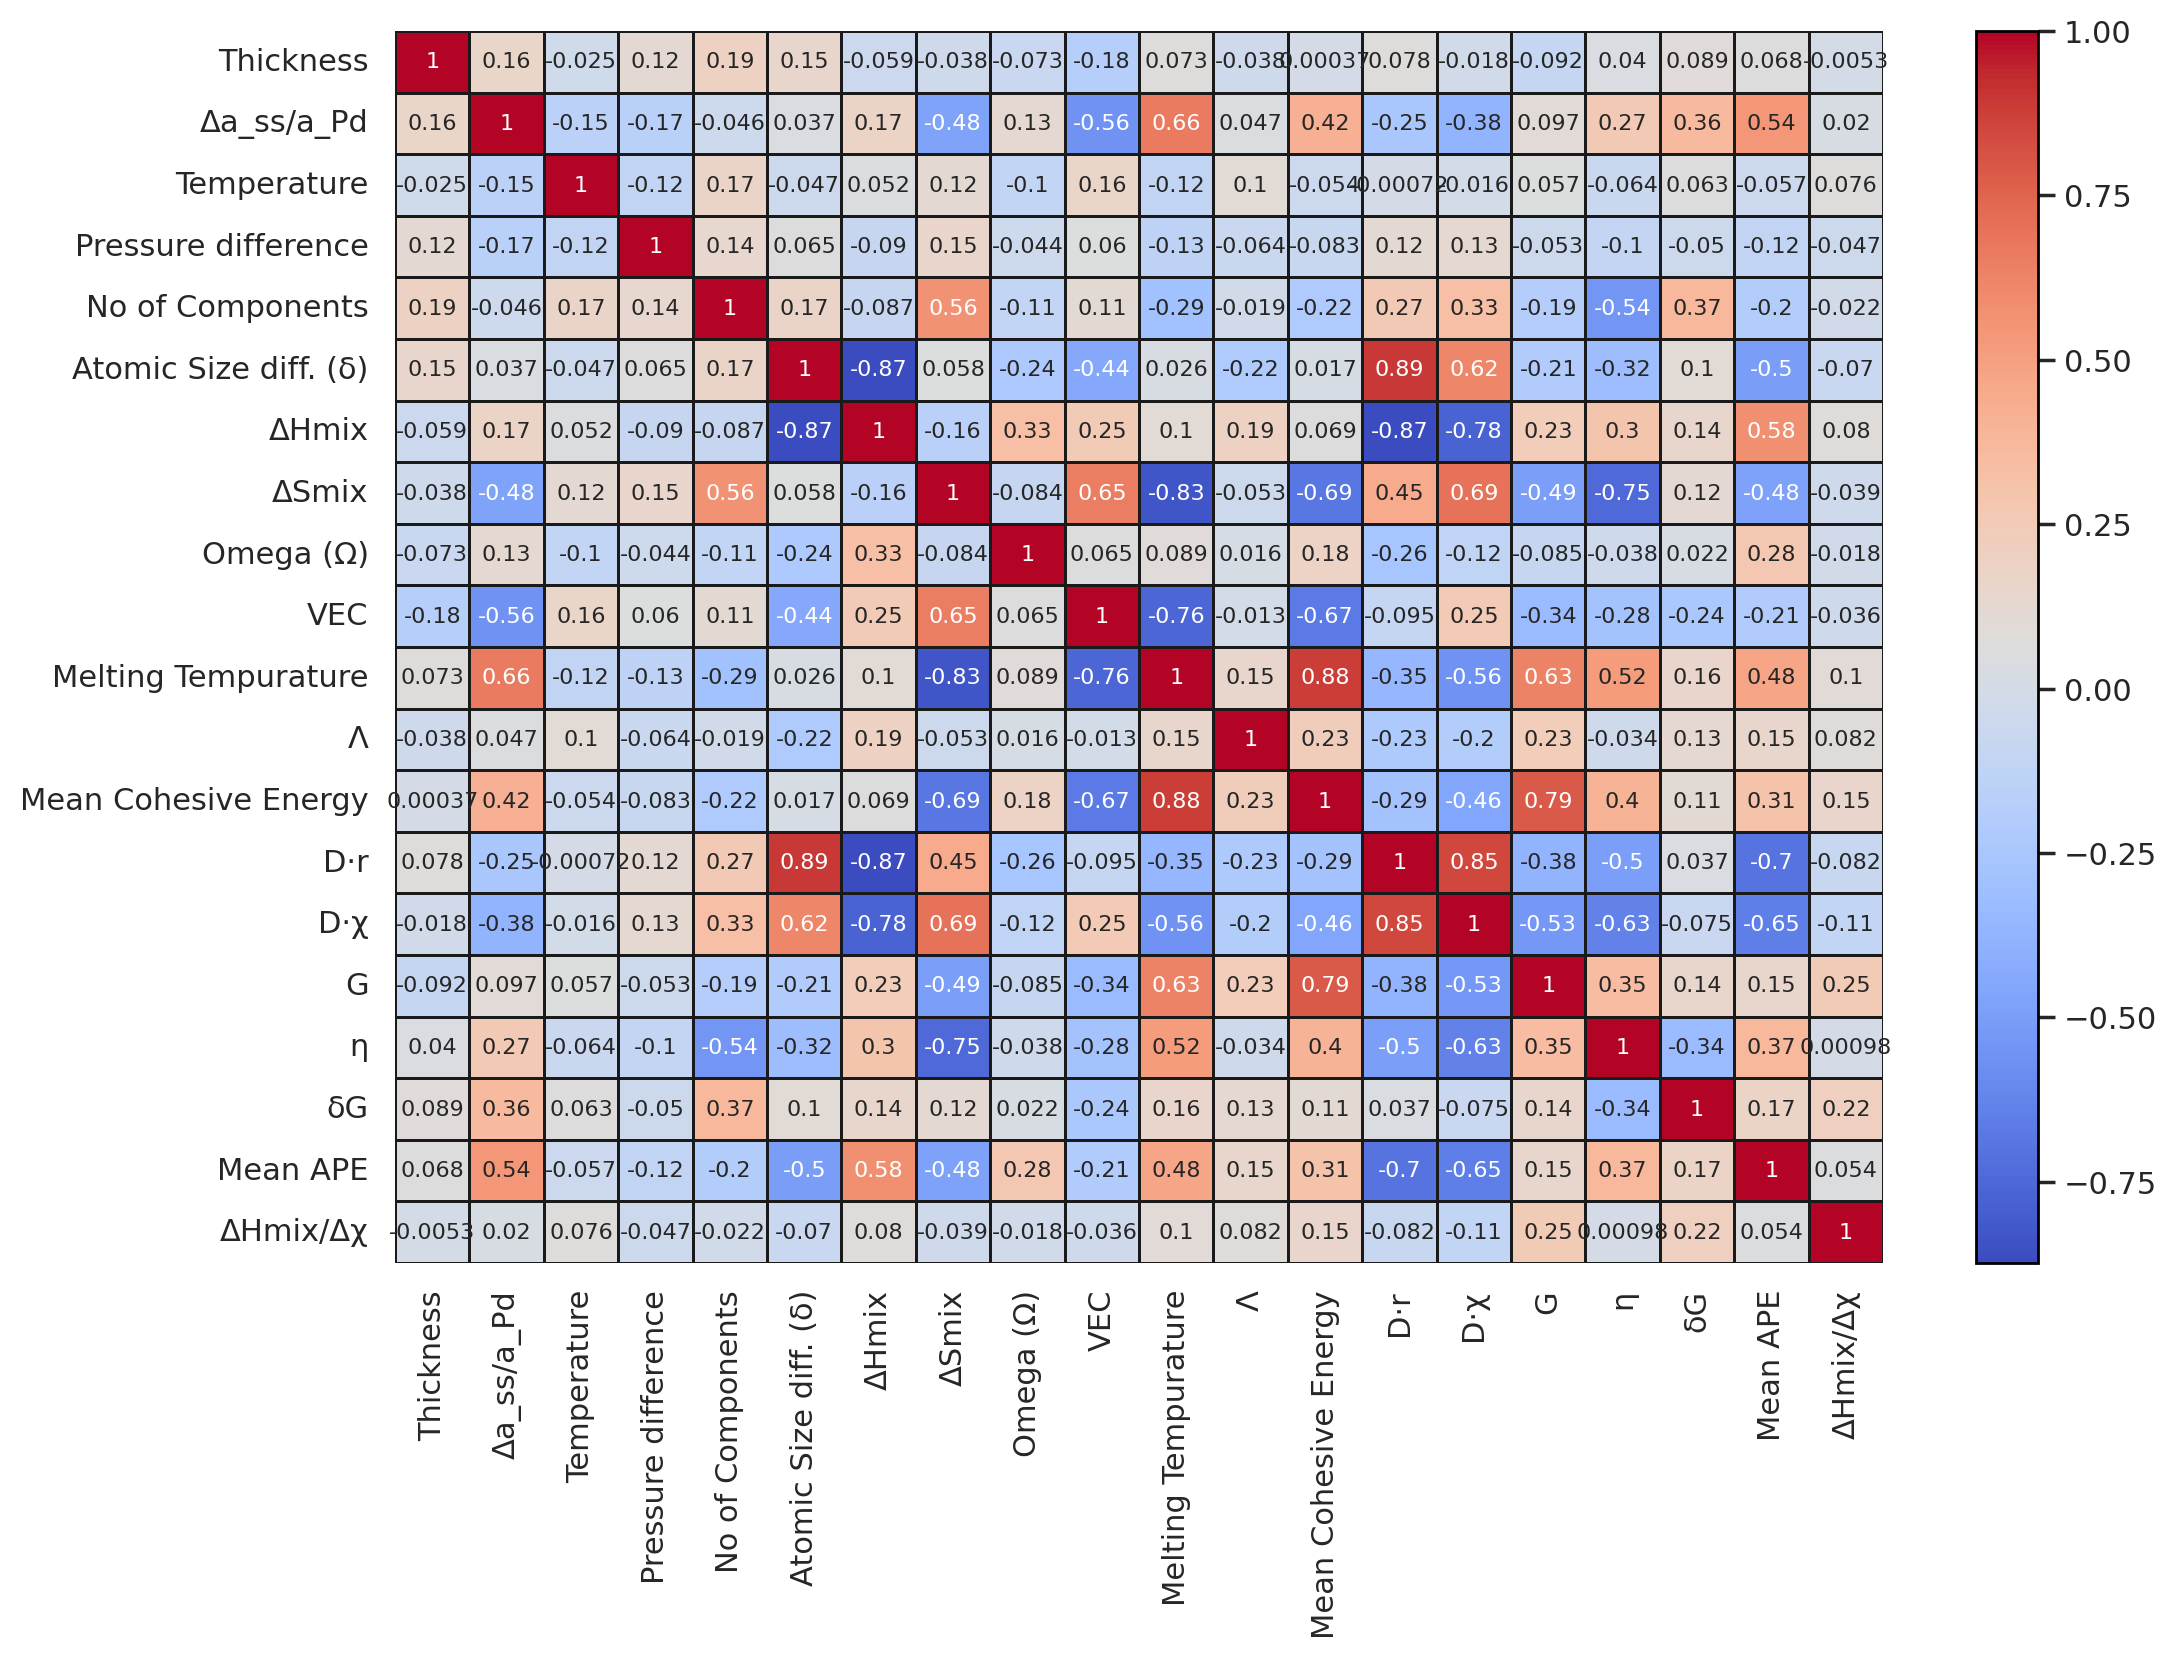

CPU times: user 1.9 s, sys: 180 ms, total: 2.08 s
Wall time: 2.1 s


In [ ]:
%%time
sns.set_theme()
fig, ax = plt.subplots(figsize=(12, 8)) #figsize=(16, 12)
im=sns.heatmap(corr_matrix, cmap='coolwarm',  annot=True, linewidths=1, linecolor='k', annot_kws={'fontsize':8}, ax=ax)
cbar = ax.collections[0].colorbar
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(1)
# mpl.rcParams['svg.fonttype']='none'
# fig.tight_layout()
fig.savefig(fname='/content/drive/MyDrive/PhD_Pd alloy prediction/Figures_Pd_Permeability_Prediction/heatmap_exp_bond.svg', bbox_inches='tight', dpi=600, transparent=True)
plt.show()